In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
%matplotlib inline

In [9]:
df=pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


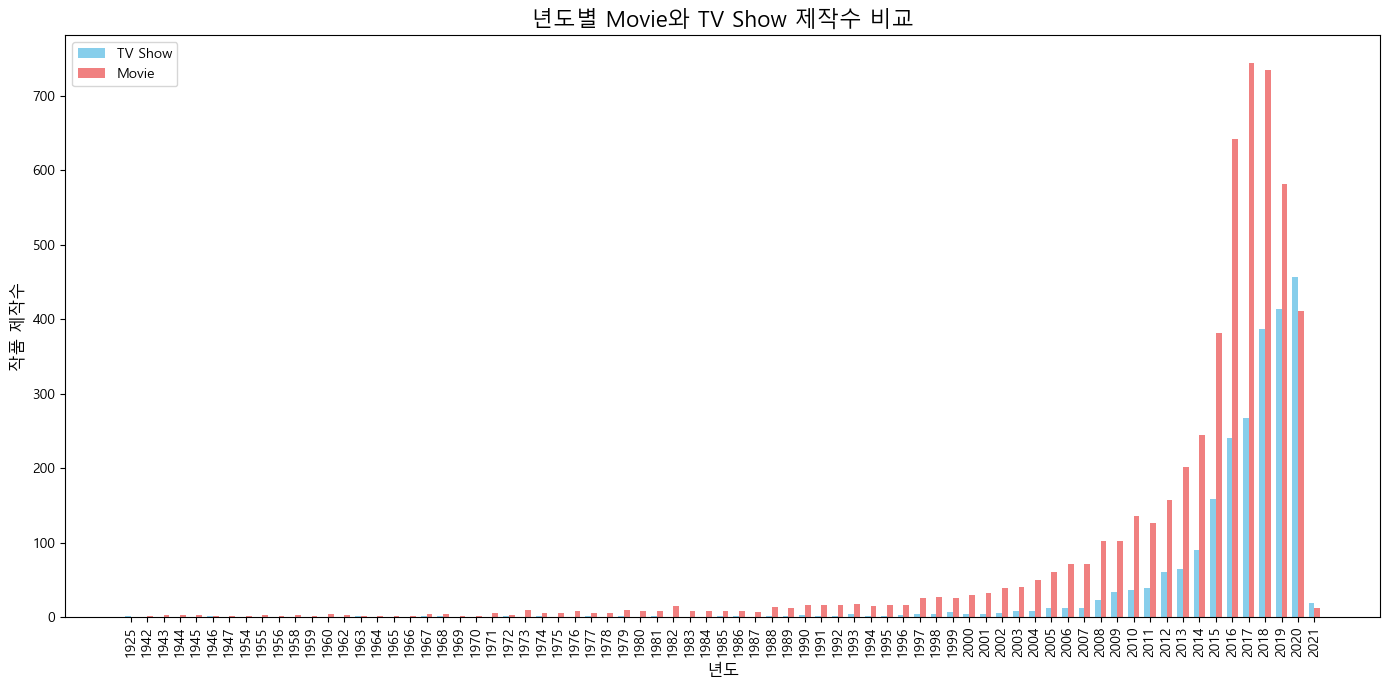

In [11]:
df = pd.read_csv('netflix.csv')

type_by_year = df.groupby(['release_year', 'type']).size().unstack() 

type_by_year = type_by_year.fillna(0) 

years = type_by_year.index
bar_width = 0.35

movies = type_by_year['Movie']
tv_shows = type_by_year['TV Show']

index = np.arange(len(years)) 

plt.figure(figsize=(14, 7)) 

plt.bar(index, tv_shows, bar_width, label='TV Show', color='skyblue') 
plt.bar(index + bar_width, movies, bar_width, label='Movie', color='lightcoral')
 
plt.title('년도별 Movie와 TV Show 제작수 비교', fontsize=16) 
plt.xlabel('년도', fontsize=12)
plt.ylabel('작품 제작수', fontsize=12)

plt.xticks(index + bar_width / 2, years, rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

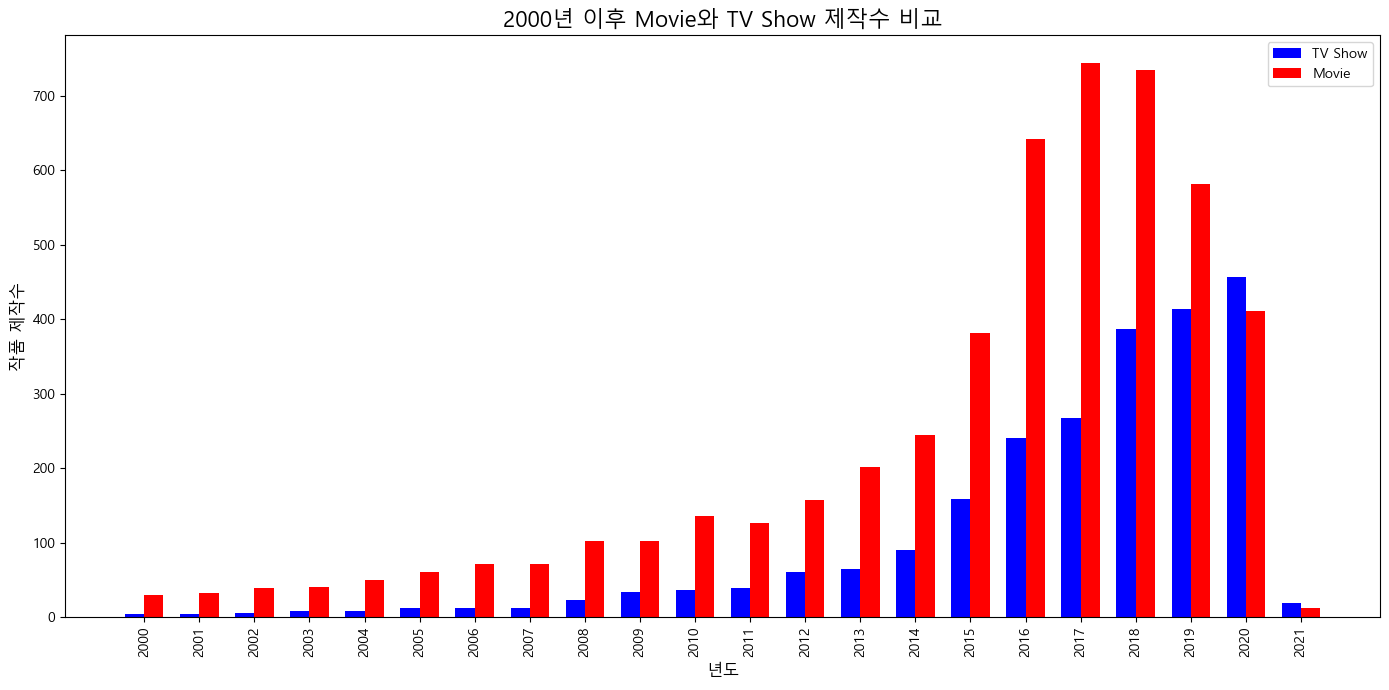

In [13]:
df = pd.read_csv('netflix.csv')

df = df[df['release_year'] >= 2000] # 2000년 이후의 데이터만 필터링

type = df.groupby(['release_year', 'type']).size().unstack() # 연도별로 타입(MOVIE, TV SHOW)의 개수를 계산

type = type.fillna(0) # NaN 값을 0으로 대체

years = type.index # 연도 리스트와 너비 설정
barwidth = 0.35

movies = type['Movie'] # Movie와 TV Show의 데이터
tvshows = type['TV Show']
 
index = np.arange(len(years)) # x 좌표 설정

plt.figure(figsize=(14, 7)) # 그래프 크기 설정

plt.bar(index, tvshows, barwidth, label='TV Show', color='blue') # Movie와 TV Show의 막대 그래프를 나란히 그리기
plt.bar(index + barwidth, movies, barwidth, label='Movie', color='red')

plt.title('2000년 이후 Movie와 TV Show 제작수 비교', fontsize=16) # 제목 및 축 레이블 설정
plt.xlabel('년도', fontsize=12)
plt.ylabel('작품 제작수', fontsize=12)

plt.xticks(index + barwidth / 2, years, rotation=90) # x축의 연도를 설정하고 각 막대의 위치 조정

plt.legend()
plt.tight_layout()
plt.show()